In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer



In [2]:
properties = pd.read_csv("data/raw/properties.csv")

In [3]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75511 entries, 0 to 75510
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75511 non-null  int64  
 1   price                           75511 non-null  float64
 2   property_type                   75511 non-null  object 
 3   subproperty_type                75511 non-null  object 
 4   region                          75511 non-null  object 
 5   province                        75511 non-null  object 
 6   locality                        75511 non-null  object 
 7   zip_code                        75511 non-null  int64  
 8   latitude                        61413 non-null  float64
 9   longitude                       61413 non-null  float64
 10  construction_year               42120 non-null  float64
 11  total_area_sqm                  67896 non-null  float64
 12  surface_land_sqm                

In [4]:
#Handling Missing Values

# Calculate the proportion of missing values per column
missing_proportion = properties.isnull().mean()

# Display the result as a percentage
missing_percentage = missing_proportion * 100
print(missing_percentage)

id                                 0.000000
price                              0.000000
property_type                      0.000000
subproperty_type                   0.000000
region                             0.000000
province                           0.000000
locality                           0.000000
zip_code                           0.000000
latitude                          18.670128
longitude                         18.670128
construction_year                 44.220047
total_area_sqm                    10.084623
surface_land_sqm                  48.014197
nbr_frontages                     34.890281
nbr_bedrooms                       0.000000
equipped_kitchen                   0.000000
fl_furnished                       0.000000
fl_open_fire                       0.000000
fl_terrace                         0.000000
terrace_sqm                       17.401438
fl_garden                          0.000000
garden_sqm                         3.892148
fl_swimming_pool                

In [5]:
properties = properties.drop(columns=["nbr_frontages", "surface_land_sqm", 
                                      "fl_terrace", "fl_garden", "epc","fl_open_fire","fl_swimming_pool",
                                      "heating_type", "cadastral_income","longitude","latitude"], axis=1)



In [6]:
properties = properties.dropna()

In [7]:
(properties==0).sum()

id                                    0
price                                 0
property_type                         0
subproperty_type                      0
region                                0
province                              0
locality                              0
zip_code                              0
construction_year                     0
total_area_sqm                        0
nbr_bedrooms                        590
equipped_kitchen                      0
fl_furnished                      20217
terrace_sqm                        9694
garden_sqm                        15558
fl_floodzone                      12480
state_building                        0
primary_energy_consumption_sqm      880
fl_double_glazing                  5090
dtype: int64

In [8]:
#properties = properties.drop(columns=["state_building"], axis=1)

In [9]:
properties.construction_year = properties.construction_year.astype("int64")
properties.nbr_bedrooms = properties.nbr_bedrooms.astype("int64")

In [10]:
properties.shape

(20758, 19)

In [11]:
# Displays the first 5 rows

properties.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,terrace_sqm,garden_sqm,fl_floodzone,state_building,primary_energy_consumption_sqm,fl_double_glazing
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,1963,100.0,2,INSTALLED,0,5.0,0.0,0,MISSING,231.0,1
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,2024,187.0,3,MISSING,0,0.0,0.0,1,MISSING,99.0,0
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,2022,169.0,2,HYPER_EQUIPPED,0,20.0,142.0,0,AS_NEW,19.0,0
9,58028000,3500000.0,HOUSE,VILLA,Flanders,West Flanders,Brugge,8300,1935,277.0,6,MISSING,0,0.0,0.0,0,TO_RENOVATE,394.0,0
20,10079000,549000.0,HOUSE,VILLA,Flanders,East Flanders,Dendermonde,9240,2001,185.0,4,HYPER_EQUIPPED,0,0.0,0.0,0,AS_NEW,142.0,1


In [12]:
properties.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,3.985946e+07,2.288478e+07,2000.0,20232250.00,39800000.0,59707000.0,79482000.0
price,20758.0,4.517904e+05,4.686182e+05,77000.0,239900.00,330000.0,489000.0,11450000.0
zip_code,20758.0,4.699065e+03,3.108111e+03,1000.0,1850.00,3800.0,8300.0,9992.0
construction_year,20758.0,1.974309e+03,4.086762e+01,1759.0,1954.00,1976.0,2010.0,2024.0
total_area_sqm,20758.0,1.606949e+02,1.310233e+02,12.0,89.25,126.0,192.0,5000.0
nbr_bedrooms,20758.0,2.800607e+00,1.762282e+00,0.0,2.00,3.0,3.0,100.0
fl_furnished,20758.0,2.606224e-02,1.593243e-01,0.0,0.00,0.0,0.0,1.0
terrace_sqm,20758.0,1.370012e+01,4.168494e+01,0.0,0.00,3.0,17.0,3466.0
garden_sqm,20758.0,1.736630e+02,1.279607e+03,0.0,0.00,0.0,1.0,65000.0
fl_floodzone,20758.0,3.987860e-01,4.896604e-01,0.0,0.00,0.0,1.0,1.0


In [13]:
properties.dtypes

id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
construction_year                   int64
total_area_sqm                    float64
nbr_bedrooms                        int64
equipped_kitchen                   object
fl_furnished                        int64
terrace_sqm                       float64
garden_sqm                        float64
fl_floodzone                        int64
state_building                     object
primary_energy_consumption_sqm    float64
fl_double_glazing                   int64
dtype: object

In [14]:
# Data preprocessing

In [15]:
#we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 
obj = (properties.dtypes == 'object')
property_type = list(obj[obj].index)
print("Categorical variables:",len(property_type))

int_ = (properties.dtypes == 'int')
zip_code = list(int_[int_].index)
print("Integer variables:",len(zip_code))

fl = (properties.dtypes == 'float')
price  = list(fl[fl].index)
print("Float variables:",len(price ))


Categorical variables: 7
Integer variables: 0
Float variables: 5


In [16]:
imputer=SimpleImputer(strategy='mean')
properties['construction_year']=imputer.fit_transform(properties[['construction_year']])

In [17]:
#Transforming data into Ordinal
#Cleaning existing kitchen data
ord_house_data= properties.drop(properties[properties['equipped_kitchen'] == 'MISSING'].index)

#Assigning numeric values to kitchen categories
ord_house_data['nr_equipped_kitchen']=ord_house_data['equipped_kitchen'].replace(['SEMI_EQUIPPED','USA_SEMI_EQUIPPED','HYPER_EQUIPPED','USA_HYPER_EQUIPPED','INSTALLED','USA_INSTALLED','USA_UNINSTALLED','UNINSTALLED','NOT_INSTALLED'],[3,3,4,4,2,2,1,1,1])

#Cleaning existing state of building data
ord_house_data= ord_house_data.drop(ord_house_data[ord_house_data['state_building'] == 'MISSING'].index)

#Assigning numeric values to state of building categories
ord_house_data['nr_state_building']=ord_house_data['state_building'].replace(['AS_NEW','JUST_RENOVATED','GOOD','TO_BE_DONE_UP','TO_RESTORE','TO_RENOVATE'],[5,5,4,3,2,1])

C:\Users\yusra\AppData\Local\Temp\ipykernel_6916\4270503716.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ord_house_data['nr_equipped_kitchen']=ord_house_data['equipped_kitchen'].replace(['SEMI_EQUIPPED','USA_SEMI_EQUIPPED','HYPER_EQUIPPED','USA_HYPER_EQUIPPED','INSTALLED','USA_INSTALLED','USA_UNINSTALLED','UNINSTALLED','NOT_INSTALLED'],[3,3,4,4,2,2,1,1,1])
C:\Users\yusra\AppData\Local\Temp\ipykernel_6916\4270503716.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ord_house_data['nr_state_building']=ord_house_data['state

In [18]:

# Handling missing data
properties.fillna('MISSING', inplace=True)

# Convert categorical variables  into numerical values using one-hot encoding

properties = pd.get_dummies(properties, columns=['property_type','locality','state_building','subproperty_type','region','province'], drop_first=True)




In [19]:
# Numeric data: fill NaNs with the mean of the column

properties['terrace_sqm'] = properties['terrace_sqm'].fillna(properties['terrace_sqm'].mean())

properties['garden_sqm'] = properties['garden_sqm'].fillna(properties['garden_sqm'].mean())

properties['primary_energy_consumption_sqm'] = properties['primary_energy_consumption_sqm'].fillna(properties['primary_energy_consumption_sqm'].mean())





In [20]:
#Feature scaling ensures that features are on the same scale, which is especially important for distance-based algorithms and those sensitive to magnitude.

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Scaling numerical features
scaler = StandardScaler()
properties[['total_area_sqm', 'terrace_sqm','garden_sqm']] = scaler.fit_transform(properties[['total_area_sqm', 'terrace_sqm','garden_sqm']])


In [22]:
properties[['price']].describe()

,price
count,2.075800e+04
mean,4.517904e+05
std,4.686182e+05
min,7.700000e+04
25%,2.399000e+05
50%,3.300000e+05
75%,4.890000e+05
max,1.145000e+07


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'zip_code'}>,
        <Axes: title={'center': 'construction_year'}>],
       [<Axes: title={'center': 'total_area_sqm'}>,
        <Axes: title={'center': 'nbr_bedrooms'}>,
        <Axes: title={'center': 'fl_furnished'}>,
        <Axes: title={'center': 'terrace_sqm'}>],
       [<Axes: title={'center': 'garden_sqm'}>,
        <Axes: title={'center': 'fl_floodzone'}>,
        <Axes: title={'center': 'primary_energy_consumption_sqm'}>,
        <Axes: title={'center': 'fl_double_glazing'}>],
       [<Axes: title={'center': 'price_per_sqm'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

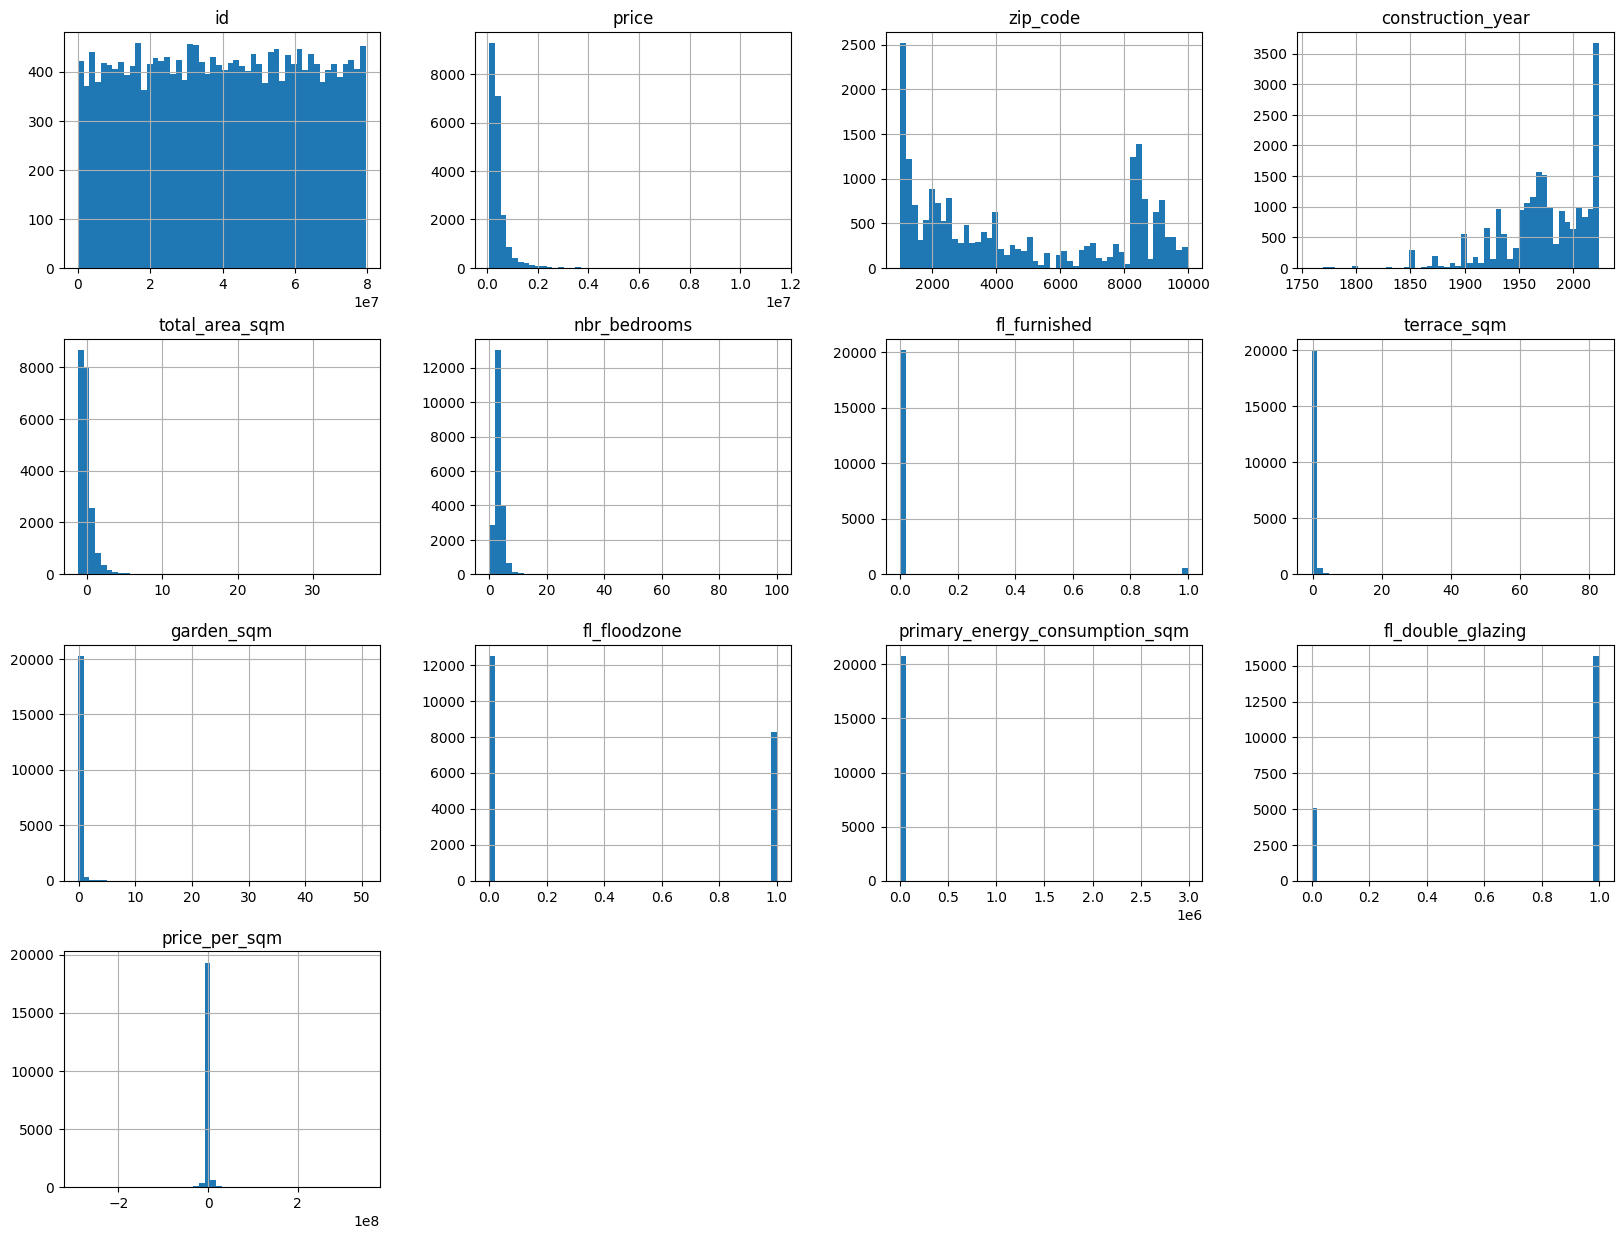

In [28]:
properties.hist(bins=50, figsize=(20,15))

In [23]:
#Feature Engineering (Optional)

#Create new features if they add meaningful insights. Here are some examples:
#Price per square meter: Divide price by area if the target is price.

In [24]:
import seaborn as sns
import numpy as np

properties['price_per_sqm'] = properties['price'] / properties['total_area_sqm']
properties.price_per_sqm = properties.price_per_sqm.round(2)


In [25]:
avg_price=properties[['price']].mean()
print(avg_price)
median_price=properties[['price']].median()
print(median_price)


price    451790.411167
dtype: float64
price    330000.0
dtype: float64


In [26]:
#Splitting the Data into Training and Testing Sets

#Split the data into training and testing sets to validate the model’s performance.

# Define features and target

X = properties.drop(columns=['price'])  

y = properties['price']  # 'price' is the target variable



# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
with open("data/cleaned/properties.csv", "wb") as csv_file:
    pd.DataFrame.to_csv(properties, csv_file, index=False)